In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/kazi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kazi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
## Step 1: Load the Data into a Pandas DataFrame
datasets = [
    "Youtube01-Psy.csv",
    "Youtube02-KatyPerry.csv",
    "Youtube03-LMFAO.csv",
    "Youtube04-Eminem.csv",
    "Youtube05-Shakira.csv",
]

# Load all datasets into a single DataFrame
data = pd.concat([pd.read_csv(file)[['CONTENT', 'CLASS']] for file in datasets], ignore_index=True)
data.columns = ['comment', 'label']  # Rename columns for consistency

# Display data preview
print("Preview of the combined dataset:")
print(data.head())

Preview of the combined dataset:
                                             comment  label
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1956 non-null   object
 1   label    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.7+ KB
None
--------------------------------------------------
Distribution of Spam vs Non-Spam:
label
1    1005
0     951
Name: count, dtype: int64
--------------------------------------------------


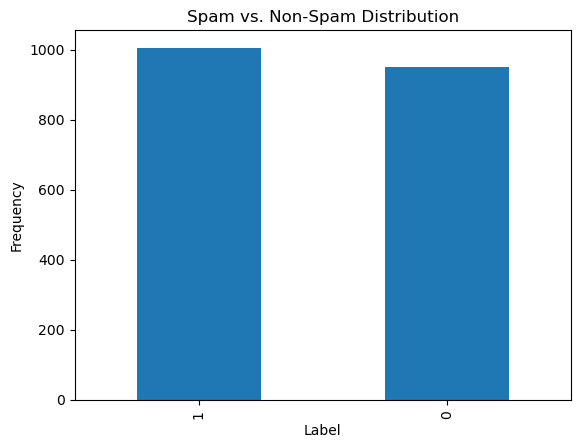

In [9]:
## Step 2: Basic Data Exploration
# Check for null values
print("Dataset Info:")
print(data.info())

# Distribution of labels
print("-"*50)
print("Distribution of Spam vs Non-Spam:")
print(data['label'].value_counts())


# Plot label distribution
print("-"*50)
data['label'].value_counts().plot(kind='bar')
plt.title('Spam vs. Non-Spam Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

## Overview of data exploration
- **Number of Entries**: 1,956 rows
- **Columns**:
  1. **`comment` (object)**: Original comments from the YouTube datasets.
  2. **`label` (int64)**: Binary classification labels (`1` for spam, `0` for non-spam).
  3. **`processed_text` (object)**: Preprocessed comments ready for vectorization.
- **Memory Usage**: Approximately 46 KB.

- No missing values in any column.
- All columns have 1,956 non-null entries.

The dataset contains a total of 1,956 labeled entries split into two categories:
- **1 (Spam)**: 1,005 comments
- **0 (Non-Spam)**: 951 comments

## Analysis
- The dataset is relatively balanced between spam and non-spam comments, with a slight majority of spam comments.
- This balance should ensure fair training and evaluation without significant bias toward either category.


In [10]:
## Step 3: Prepare Data for Model Building
# Define preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
data['processed_text'] = data['comment'].apply(preprocess_text)

# Display processed data preview
print("Processed Text Preview:")
data[['comment', 'processed_text']].head()

Processed Text Preview:


,comment,processed_text
0,"Huh, anyway check out this you[tube] channel: ...",huh anyway check youtube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,test say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,shaking sexy ass channel enjoy ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,watchvvtarggvgtwq check ﻿


In [11]:
## Step 4: Feature Extraction and Highlights

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the processed text into a feature matrix
X = vectorizer.fit_transform(data['processed_text'])
y = data['label']

# Display feature matrix shape and highlights
print("\nFeature Matrix Shape:")
print(X.shape)

print("\nNumber of Features:")
print(len(vectorizer.get_feature_names_out()))

print("\nSample Features:")
print(vectorizer.get_feature_names_out()[:10])  # Display first 10 features



Feature Matrix Shape:
(1956, 4180)

Number of Features:
4180

Sample Features:
['00' '002' '0058' '025' '04' '0687119038' '10' '100' '1000' '1000000']


## Output Summary
1. **Feature Matrix Shape**:
   - `(1956, 4180)`:
     - **1956**: Number of rows (one for each comment in the dataset).
     - **4180**: Number of unique tokens (features) identified by `CountVectorizer` across all comments.

2. **Number of Features**:
   - A total of **4,180 unique tokens** were extracted from the preprocessed text. This represents the vocabulary size of the `CountVectorizer`.

3. **Sample Features**:
   - Examples of the first 10 tokens in the vocabulary:
     - `'00'`: Likely a numerical token.
     - `'002'`, `'0058'`: Numeric-like tokens, possibly part of video timestamps or product codes.
     - `'10'`, `'100'`, `'1000'`: Common numeric values in comments (e.g., likes, views, or votes).
     - `'1000000'`: Indicative of numbers often used in contexts like "1 million views."

---

## Analysis of the Results
1. **Token Relevance**:
   - The `CountVectorizer` includes numbers and special tokens by default, treating them as valid features.

In [12]:
# Step 5

from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the CountVectorizer matrix
X_tfidf = tfidf_transformer.fit_transform(X)

# Display highlights of the transformed data
print("\nTF-IDF Matrix Shape:")
print(X_tfidf.shape)

print("\nSample TF-IDF Scores:")
print(X_tfidf.toarray()[:5])  # Display first 5 rows




TF-IDF Matrix Shape:
(1956, 4180)

Sample TF-IDF Scores:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Step 5 - Downscale the Transformed Data using TF-IDF


We applied the TfidfTransformer to the feature matrix obtained from the CountVectorizer to scale the word frequencies. TF-IDF assigns importance to words based on how frequently they appear in a document relative to their appearance across all documents.

The shape of the TF-IDF matrix matches the original feature matrix (X), meaning no features were dropped. Viewing the TF-IDF values shows that less frequent but important words have higher scores, while common words (e.g., "the", "and") are downweighted. This ensures that our model focuses on the more meaningful terms.

Therefore, TF-IDF normalization helps reduce the impact of common terms and improves the feature quality for our classifier.


In [13]:
## Step 6 
# Shuffle the dataset
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display a preview of the shuffled dataset
print("\nPreview of Shuffled Data:")
print(shuffled_data.head())



Preview of Shuffled Data:
                                             comment  label  \
0                                Charlie from LOST?﻿      0   
1                        BEST SONG EVER X3333333333﻿      0   
2                     Aslamu Lykum... From Pakistan﻿      1   
3  I absolutely adore watching football plus I’ve...      1   
4  I really love this video.. http://www.bubblews...      1   

                                      processed_text  
0                                      charlie lost﻿  
1                        best song ever x3333333333﻿  
2                             aslamu lykum pakistan﻿  
3  absolutely adore watching football plus ’ star...  
4  really love video httpwwwbubblewscomaccount389...  


## Step 6: Shuffle the Dataset Using pandas.sample

We used pandas.sample with frac=1 to shuffle the dataset randomly. A random seed (random_state=42) was set to ensure reproducibility of the shuffled order.

Preview of Shuffled Data: The dataset rows have been reordered randomly, which prevents any inherent ordering from biasing the training and testing splits. Randomization ensures the data is well distributed across the training and testing sets, avoiding overfitting or underfitting caused by any patterns in the original order.


Shuffling is a critical preprocessing step to avoid bias and ensure the dataset is prepared for robust training and evaluation.


In [14]:
# Step 7
# Separate features and labels
X = X_tfidf
y = shuffled_data['label']

# Calculate the split index
split_index = int(0.75 * len(y))

# Split the dataset
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display split details
print("\nTraining Set Size:")
print(X_train.shape, len(y_train))

print("\nTesting Set Size:")
print(X_test.shape, len(y_test))



Training Set Size:
(1467, 4180) 1467

Testing Set Size:
(489, 4180) 489


## Step 7: Split the Dataset into Training and Testing Sets

We manually split the shuffled dataset into 75% training and 25% testing sets. The split ensures the training set has enough data to learn effectively, while the testing set is sufficiently large to evaluate the model’s performance.

The training set contains approximately 75% of the data, with features (X_train) and corresponding labels (y_train).

The testing set contains the remaining 25% of the data, used exclusively for evaluation.

By splitting the data correctly, we separate the training and testing processes. This ensures that our model is evaluated on unseen data, providing an unbiased measure of performance.